In [7]:
import numpy as np
from skimage.exposure import adjust_gamma
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
data_path = os.path.join("..", "data")
skimmia_path = os.path.join(data_path, "skimmia")
skimmia_images_train_dir = os.path.join(skimmia_path, "images/train")

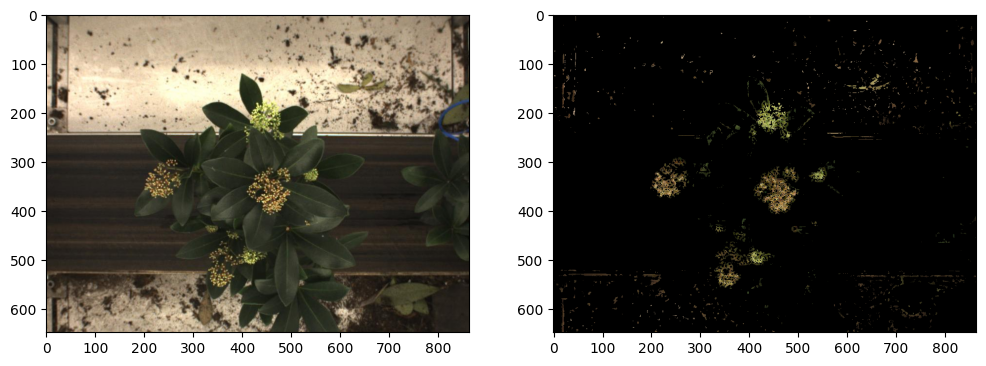

In [68]:
images = os.listdir(skimmia_images_train_dir)

idx = np.random.choice(len(images))
img_path = os.path.join(skimmia_images_train_dir, images[idx])
image = np.array(Image.open(img_path))

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
mean_luminance = np.mean(hls[:,:,2])
    
if mean_luminance < 50:
    gamma = 0.7
    lower = np.array([40, 0, 50])
    upper = np.array([180, 170, 255])
        
elif mean_luminance > 85:
    gamma = 1.2
    lower = np.array([40, 0, 90])
    upper = np.array([180, 170, 255])
        
else:
    gamma = 0.8
    lower = np.array([40, 0, 70])
    upper = np.array([180, 170, 255])
        
image_gamma = adjust_gamma(image, gamma)
image_hls = cv2.cvtColor(image_gamma, cv2.COLOR_BGR2HLS)
mask = cv2.inRange(image_hls, lower, upper)
processed_image = cv2.bitwise_and(image_gamma, image_gamma, mask=mask)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(image)
ax2.imshow(processed_image)
plt.show()